Group Name: SSSL
Group Member: 

In [92]:
%matplotlib inline

In [93]:
import re
import pandas as pd
import collections
import time
import matplotlib.pyplot as plt

In [94]:
data = pd.read_excel("DV_Dataset.xlsx")

In [95]:
data

,Incident,Date reported,Time reported,Date occurred,Time occurred,General Location,Crime Description,Disposition
0,II1700001,2017-01-01,2:15,2017-01-01 00:00:00,2:14,GREEN E / FIRST ST,DRIVING UNDER THE INFL-ALCOHOL,ARREST
1,II1700001,2017-01-01,2:15,2017-01-01 00:00:00,2:14,GREEN E / FIRST ST,CANNABIS POSS 10 GM OR LESS -ORD,PENDING
2,II1700001,2017-01-01,2:15,2017-01-01 00:00:00,2:14,GREEN E / FIRST ST,BREATH ALCOHOL OVER LIMIT,ARREST
3,IF1700001,2017-01-01,0:43,2017-01-01 00:00:00,0:43,51 E GREGORY,FIGHT,ADMIN CLOSED
4,IF1700002,2017-01-01,1:19,2017-01-01 00:00:00,1:19,SHERMAN RESIDENCE HALL,LIQUOR - UNDERAGE,ADMIN CLOSED
5,II1700002,2017-01-03,8:35,2014-08-14 00:00:00,12:00,300 blk of BLUESTEM DR,THEFT OVER $500,ADMIN. CLOSE
6,II1700004,2017-01-03,19:08,2017-01-03 00:00:00,19:08,NEIL ST / AVONDALE DR,WARRANT-IN STATE,ARREST
7,II1700005,2017-01-04,9:09,2017-01-04 00:00:00,9:09,BIKE RACK,THEFT $500 AND UNDER,PENDING
8,CSA16-128,2017-01-04,8:00,2016-12-22 00:00:00,9:30,ILLINOIS STREET RESIDENCE,SEX HARASSMENT,ADMIN CLOSED
9,II1700007,2017-01-05,15:05,2017-01-03 00:00:00,18:10,ILLINI UNION BOOKSTORE,THEFT OVER $500,ARREST


In [96]:
Location = collections.Counter(data["General Location"])
Location.most_common()

[('RED LION', 281),
 ('UNKNOWN LOCATION', 87),
 ('SDRP', 81),
 ('ILLINI UNION BOOKSTORE', 70),
 ("JOE'S BREWERY", 62),
 ('KAMS', 59),
 ('ILLINI UNION', 55),
 ('PRIVATE APARTMENT', 54),
 ('CLYBOURNE', 53),
 ('ALLEN RESIDENCE HALL', 49),
 ('blk of E JOHN ST', 42),
 ('OGLESBY RESIDENCE HALL', 41),
 ('ON CAMPUS', 40),
 ('WESTON RESIDENCE HALL', 38),
 ('JOES BREWERY', 38),
 ('COUNTY MARKET', 38),
 ('SCOTT RESIDENCE HALL', 37),
 ('TOWNSEND RESIDENCE HALL', 37),
 ('HOPKINS RESIDENCE HALL', 37),
 ('WASSAJA RESIDENCE HALL', 37),
 ('ARC', 35),
 ('TRELEASE RESIDENCE HALL', 35),
 ('BROTHERS BAR', 35),
 ('ILLINOIS TERMINAL', 31),
 ('200 blk of E GREEN ST', 31),
 ('300 blk of E GREEN ST', 30),
 ('CIRCLE K', 25),
 ('SHERMAN RESIDENCE HALL', 22),
 ('WESTON RES HALL', 21),
 ('ALLEN RES HALL', 21),
 ('CARR RESIDENCE HALL', 21),
 ('SNYDER RESIDENCE HALL', 21),
 ('300 blk of E JOHN ST', 21),
 ('RESIDENCE HALL', 21),
 ('VAN DOREN RESIDENCE HALL', 20),
 ('400 blk of E GREEN ST', 19),
 ('OGLESBY RES HALL', 1

In [97]:
collections.Counter(data["Disposition"])

Counter({'ADMIN CLOSED': 958,
         'ADMIN. CLOSE': 442,
         'ARREST': 545,
         'CLEARED EXCEPT. JUVENILE NO CU': 2,
         'CLEARED EXCEPT. PROS. FAIL TO': 8,
         'CLEARED EXCEPT. REFUSAL TO COO': 4,
         'PENDING': 219,
         'REFERRED TO OTHER JURISDICTION': 5,
         'REPORTED TO OTHER AGENCY': 1972,
         'STUDENT DISC REFERRAL': 222,
         'STUDENT DISCIPLINE': 137,
         'STUDENT DISCIPLINE REFERRAL': 59,
         'UNFOUNDED': 32,
         'WARNING (TRAFFIC)': 1,
         'unk': 1})

In [98]:
data["Disposition"]=data['Disposition'].replace(["ADMIN. CLOSE", "ADMIN CLOSED"], "ADMIN.CLOSED")
data["Disposition"]=data['Disposition'].replace(["STUDENT DISCIPLINE","STUDENT DISC REFERRAL"], "STUDENT DISCIPLINE REFERRAL")
collections.Counter(data["Disposition"])

Counter({'ADMIN.CLOSED': 1400,
         'ARREST': 545,
         'CLEARED EXCEPT. JUVENILE NO CU': 2,
         'CLEARED EXCEPT. PROS. FAIL TO': 8,
         'CLEARED EXCEPT. REFUSAL TO COO': 4,
         'PENDING': 219,
         'REFERRED TO OTHER JURISDICTION': 5,
         'REPORTED TO OTHER AGENCY': 1972,
         'STUDENT DISCIPLINE REFERRAL': 418,
         'UNFOUNDED': 32,
         'WARNING (TRAFFIC)': 1,
         'unk': 1})

In [99]:
Crime = collections.Counter(data["Crime Description"])
Crime.most_common()

[('UNLAWFUL USE OF I.D.', 412),
 ('LIQUOR-UNDERAGE', 305),
 ('DRUGS', 288),
 ('THEFT $500 AND UNDER', 263),
 ('CRIMINAL DAMAGE TO PROPERTY', 155),
 ('BURGLARY FROM MOTOR VEHICLE', 144),
 ('RAPE', 135),
 ('CANNABIS POSS 10 GM OR LESS -ORD', 122),
 ('THEFT OVER $500', 114),
 ('LARCENY', 107),
 ('MIP ALCOHOL/LIQUOR', 102),
 ('THEFT-RETAIL', 95),
 ('WARRANT-IN STATE', 90),
 ('ASSIST OTHER POLICE DEPT', 84),
 ('DECEPTIVE PRACTICES', 83),
 ('BATTERY-DOMESTIC', 67),
 ('BATTERY-AGGRAVATED', 63),
 ('DISORDERLY CONDUCT-ALL OTHER', 61),
 ('LIQUOR - UNDERAGE', 60),
 ('POSS OF DRUG PARAPHERNALIA -ORD', 60),
 ('FRAUD-CREDIT CARD', 59),
 ('STALKING', 58),
 ('BURGLARY RESIDENTIAL', 57),
 ('PEDESTRIAN STOPS', 57),
 ('BATTERY', 52),
 ('SEX OFFENSE', 49),
 ('DOMESTIC DISPUTE', 45),
 ('RESIST/OBS CORRECT/POLICE/FIRE', 42),
 ('THEFT OF LOST/MISLAID PROPERTY', 42),
 ('SEXUAL-ASSAULT-CRIMINAL', 40),
 ('DRIVING UNDER THE INFL-ALCOHOL', 35),
 ('TRESPASS-STATE SUPPORTED LAND', 31),
 ('BURGLARY', 31),
 ('DOMESTI

In [100]:
data.groupby(['General Location','Crime Description']).size()

General Location                  Crime Description                  
1 MAIN STREET, LAS VEGAS, NEVADA  DOMESTIC BATTERY                       1
100 BLK CHALMERS                  LIQUOR-UNDERAGE                        1
100 BLK E CHALMERS                DOMESTIC OFFENSE                       1
100 blk of CHALMERS ST            BATTERY                                1
                                  BATTERY-DOMESTIC                       2
                                  BURGLARY FROM MOTOR VEHICLE            3
                                  CRIMINAL DAMAGE TO PROPERTY            4
                                  CRISIS INTERVEN. - SUICIDE IDEATION    1
                                  THEFT OVER $500                        1
100 blk of COLER AV S             ASSAULT-AGGRAVATED                     1
                                  ASSIST TOW TRUCK                       1
                                  CONTROLLED SUBSTANCE-POSSESSION        1
                              

In [101]:
# DV for Public / Properties

In [102]:
def location_sort(location):
    status = []
    crime = data["Crime Description"]
    st = r' ST| DR| AV| AVE| E | N | W | S |'
    Outside = 0
    Indoor = 0
    for i in range(len(location)):
        if len(set(re.findall(st,location[i])))==1:
            status.append("Outside")
            Outside +=1
        else:
            Indoor +=1
            status.append("Indoor")
    status = pd.DataFrame(status)
    result = pd.concat([location, crime, status], axis=1)
    result.columns = ['Location','Crime Description','Status']
    return result

In [103]:
In_N_Out = location_sort(data["General Location"])
In_N_Out 

,Location,Crime Description,Status
0,GREEN E / FIRST ST,DRIVING UNDER THE INFL-ALCOHOL,Indoor
1,GREEN E / FIRST ST,CANNABIS POSS 10 GM OR LESS -ORD,Indoor
2,GREEN E / FIRST ST,BREATH ALCOHOL OVER LIMIT,Indoor
3,51 E GREGORY,FIGHT,Indoor
4,SHERMAN RESIDENCE HALL,LIQUOR - UNDERAGE,Outside
5,300 blk of BLUESTEM DR,THEFT OVER $500,Indoor
6,NEIL ST / AVONDALE DR,WARRANT-IN STATE,Indoor
7,BIKE RACK,THEFT $500 AND UNDER,Outside
8,ILLINOIS STREET RESIDENCE,SEX HARASSMENT,Indoor
9,ILLINI UNION BOOKSTORE,THEFT OVER $500,Outside


In [104]:
in_data = []
ot_data = []
for i in range(len(In_N_Out)):
    if In_N_Out['Status'][i] == 'Indoor':
        in_data.append(In_N_Out['Crime Description'][i])
    else:
        ot_data.append(In_N_Out['Crime Description'][i])
in_data = pd.DataFrame({'Crime Description':in_data})
ot_data = pd.DataFrame({'Crime Description':ot_data})

In [105]:
# DV for crime types
def crime_type_sort(crime_type):  
    
    crime_1 = r'LIQUOR|ALCOHOL'
    crime_2 = r'THEFT|FRAUD|STOLEN|ROBBERY|PROPERTY|BURGLARY'
    crime_3 = r'DRUGS|CANNABIS|HEROIN'
    crime_4 = r'BATTERY|VIOLENCE|FIGHTING'
    crime_5 = r'SEX|SEXUAL|RAGE|ASSUALT'
    crime_6 = r'HARASSMENT|STALKING'
    crime_7 = r'SUICIDE'
    crime_8 = r'WEAPON|ARMED|FOID'
    crime_9 = r'I.D.'
    
    alcohol_related = 0
    property_related = 0
    drugs_related = 0
    violence_related = 0
    sexual_related = 0
    harassment_related = 0
    suicide = 0
    weapon_related = 0
    id_related = 0
    for i in range(len(crime_type)):
        crime_type[i].upper()
        if len(re.findall(crime_1,crime_type[i])) >= 1:
            alcohol_related +=1
        if len(re.findall(crime_2,crime_type[i])) >= 1:
            property_related +=1
        if len(re.findall(crime_3,crime_type[i])) >= 1:
            drugs_related +=1
        if len(re.findall(crime_4,crime_type[i])) >= 1:
            violence_related +=1
        if len(re.findall(crime_5,crime_type[i])) >= 1:
            sexual_related +=1
        if len(re.findall(crime_6,crime_type[i])) >= 1:
            harassment_related +=1
        if len(re.findall(crime_7,crime_type[i])) >= 1:
            suicide +=1
        if len(re.findall(crime_8,crime_type[i])) >= 1:
            weapon_related +=1
        if len(re.findall(crime_9,crime_type[i])) >= 1:
            id_related +=1
    print(alcohol_related,property_related,drugs_related,
          violence_related,sexual_related,harassment_related,
          suicide,weapon_related,id_related)

In [106]:
crime_type_sort(data["Crime Description"])

652 1154 474 252 513 127 40 27 419


In [107]:
# crime location + crime type

In [108]:
crime_type_sort(in_data['Crime Description'])

177 550 85 127 115 18 36 19 18


In [109]:
crime_type_sort(ot_data['Crime Description'])

475 604 389 125 398 109 4 8 401


In [110]:
# Occurred time + crime type

In [111]:
time_occurred=[]
match_type = '\d+(?=:)'
for i in range(len(data["Time occurred"])):
            time_occurred.append(re.findall(match_type,data['Time occurred'][i]))
time_occurred= pd.DataFrame(time_occurred)    
time_crime = pd.concat([time_occurred,data['Crime Description'],data['General Location']], axis=1)
time_crime.columns=["Hour",'Crime Description','General Location']
time_crime

,Hour,Crime Description,General Location
0,2,DRIVING UNDER THE INFL-ALCOHOL,GREEN E / FIRST ST
1,2,CANNABIS POSS 10 GM OR LESS -ORD,GREEN E / FIRST ST
2,2,BREATH ALCOHOL OVER LIMIT,GREEN E / FIRST ST
3,0,FIGHT,51 E GREGORY
4,1,LIQUOR - UNDERAGE,SHERMAN RESIDENCE HALL
5,12,THEFT OVER $500,300 blk of BLUESTEM DR
6,19,WARRANT-IN STATE,NEIL ST / AVONDALE DR
7,9,THEFT $500 AND UNDER,BIKE RACK
8,9,SEX HARASSMENT,ILLINOIS STREET RESIDENCE
9,18,THEFT OVER $500,ILLINI UNION BOOKSTORE


In [112]:
def drop_index(data):
    index=[]
    for i in range(len(data)):
        if data[i]==None:
            index.append(i)         
    print(index)

In [113]:
drop_index(time_crime['Hour'])

[23, 43, 46, 54, 73, 92, 163, 171, 178, 205, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 240, 241, 299, 309, 310, 314, 315, 336, 344, 353, 354, 355, 356, 422, 607, 608, 609, 639, 650, 686, 687, 688, 691, 714, 715, 755, 885, 892, 919, 959, 960, 1124, 1151, 1172, 1173, 1174, 1176, 1188, 1199, 1200, 1239, 1240, 1284, 1290, 1291, 1305, 1380, 1412, 1418, 1495, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1570, 1650, 1651, 1653, 1654, 1693, 1694, 1785, 1899, 1908, 1951, 2195, 2211, 2212, 2353, 2418, 2419, 2420, 2487, 2500, 2535, 2575, 2581, 2583, 2617, 2618, 2648, 2689, 2700, 2723, 2724, 2725, 2759, 2835, 2849, 2850, 2868, 2933, 2992, 3015, 3021, 3062, 3100, 3128, 3143, 3144, 3154, 3155, 3164, 3178, 3184, 3189, 3239, 3240, 3353, 3370, 3460, 3474, 3475, 3511, 3594, 3595, 3596, 3619, 3626, 3646, 3672, 3690, 3691, 3700, 3701, 3702, 3718, 3728, 3741, 3750, 3751, 3752, 3753, 3840

In [114]:
time_crime = time_crime.drop([23, 43, 46, 54, 73, 92, 163, 171, 178, 205, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 240, 241, 299, 309, 310, 314, 315, 336, 344, 353, 354, 355, 356, 422, 607, 608, 609, 639, 650, 686, 687, 688, 691, 714, 715, 755, 885, 892, 919, 959, 960, 1124, 1151, 1172, 1173, 1174, 1176, 1188, 1199, 1200, 1239, 1240, 1284, 1290, 1291, 1305, 1380, 1412, 1418, 1495, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1570, 1650, 1651, 1653, 1654, 1693, 1694, 1785, 1899, 1908, 1951, 2195, 2211, 2212, 2353, 2418, 2419, 2420, 2487, 2500, 2535, 2575, 2581, 2583, 2617, 2618, 2648, 2689, 2700, 2723, 2724, 2725, 2759, 2835, 2849, 2850, 2868, 2933, 2992, 3015, 3021, 3062, 3100, 3128, 3143, 3144, 3154, 3155, 3164, 3178, 3184, 3189, 3239, 3240, 3353, 3370, 3460, 3474, 3475, 3511, 3594, 3595, 3596, 3619, 3626, 3646, 3672, 3690, 3691, 3700, 3701, 3702, 3718, 3728, 3741, 3750, 3751, 3752, 3753, 3840, 4075, 4076, 4084, 4108, 4110, 4119, 4138, 4139, 4148, 4149, 4152, 4200, 4201, 4214, 4227, 4244, 4253, 4254, 4259, 4260, 4306, 4307, 4308, 4343, 4426, 4438, 4439, 4445, 4446, 4447, 4466, 4479, 4480, 4512, 4575, 4576, 4604]).reset_index(drop=True)
time_crime

,Hour,Crime Description,General Location
0,2,DRIVING UNDER THE INFL-ALCOHOL,GREEN E / FIRST ST
1,2,CANNABIS POSS 10 GM OR LESS -ORD,GREEN E / FIRST ST
2,2,BREATH ALCOHOL OVER LIMIT,GREEN E / FIRST ST
3,0,FIGHT,51 E GREGORY
4,1,LIQUOR - UNDERAGE,SHERMAN RESIDENCE HALL
5,12,THEFT OVER $500,300 blk of BLUESTEM DR
6,19,WARRANT-IN STATE,NEIL ST / AVONDALE DR
7,9,THEFT $500 AND UNDER,BIKE RACK
8,9,SEX HARASSMENT,ILLINOIS STREET RESIDENCE
9,18,THEFT OVER $500,ILLINI UNION BOOKSTORE


#period1: 21:00 -3:00
#period2: 3:00 -12:00
#period3: 12:00 -21:00
period1=[]
period2 =[]
period3 =[]
crime1 = []
crime2 = []
crime3 = []
for i in range (len(time_crime['Hour'])):
    if time_crime['Hour'][i] > '21' and time_crime['Hour'][i] <'3':
                                    period1.append(time_crime['Hour'][i])
                                    crime1.append(time_crime["Crime Description"][i])
    if int(time_crime['Hour'][i]) >3 and int(time_crime['Hour'][i])<12:
                                    period2.append(time_crime['Hour'][i])
                                    crime2.append(time_crime["Crime Description"][i])
    if int(time_crime['Hour'][i]) > 12 and int(time_crime['Hour'][i]) <21:
                                    period3.append(time_crime['Hour'][i])
                                    crime3.append(time_crime["Crime Description"][i])
period1 = pd.DataFrame(period1) 
period2 = pd.DataFrame(period2) 
period3 = pd.DataFrame(period3) 
crime1 = pd.DataFrame(crime1) 
crime2 = pd.DataFrame(crime2) 
crime3 = pd.DataFrame(crime3) 
result1 = pd.concat([period1,crime1], axis=1)
result1.columns=["Hour",'Crime Description']
result2 = pd.concat([period2,crime2], axis=1)
result2.columns=["Hour",'Crime Description']
result3 = pd.concat([period3,crime3], axis=1)
result3.columns=["Hour",'Crime Description']

In [164]:
#period1: 21:00 -3:00
#period2: 3:00 -12:00
#period3: 12:00 -21:00
period1=[]
period2 =[]
period3 =[]
index1 = []
index2 = []
index3 = []
for i in range (len(time_crime['Hour'])):
    if int(time_crime['Hour'][i]) >= 21 or int(time_crime['Hour'][i]) <= 3:
                                    period1.append(time_crime['Hour'][i])
                                    index1.append(i)
    if int(time_crime['Hour'][i]) >3 and int(time_crime['Hour'][i])<=12:
                                    period2.append(time_crime['Hour'][i])
                                    index2.append(i)
    if int(time_crime['Hour'][i]) > 12 and int(time_crime['Hour'][i]) <21:
                                    period3.append(time_crime['Hour'][i])
                                    index3.append(i)
period1 = pd.DataFrame(period1) 
period2 = pd.DataFrame(period2) 
period3 = pd.DataFrame(period3)

In [116]:
crime1 = []
for i in range(len(index1)):
    crime1.append(time_crime["Crime Description"][i])
crime2 = []
for i in range(len(index2)):
    crime2.append(time_crime["Crime Description"][i])
crime3 = []
for i in range(len(index3)):
    crime3.append(time_crime["Crime Description"][i])
crime1 = pd.DataFrame(crime1) 
crime2 = pd.DataFrame(crime2) 
crime3 = pd.DataFrame(crime3) 

In [117]:
result1 = pd.concat([period1,crime1], axis=1)
result1.columns=["Hour",'Crime Description']
result2 = pd.concat([period2,crime2], axis=1)
result2.columns=["Hour",'Crime Description']
result3 = pd.concat([period3,crime3], axis=1)
result3.columns=["Hour",'Crime Description']

In [118]:
crime_type_sort(result1["Crime Description"])

177 311 145 66 163 37 1 4 131


In [119]:
crime_type_sort(result2["Crime Description"])

105 173 110 36 130 32 0 2 29


In [120]:
crime_type_sort(result3["Crime Description"])

193 327 150 70 171 39 1 4 147


In [121]:
#Occurred time + location

In [122]:
location1 = []
for i in range(len(index1)):
    location1.append(time_crime["General Location"][i])
location2 = []
for i in range(len(index2)):
    location2.append(time_crime["General Location"][i])
location3 = []
for i in range(len(index3)):
    location3.append(time_crime["General Location"][i])
location1 = pd.DataFrame(location1) 
location2 = pd.DataFrame(location2) 
location3 = pd.DataFrame(location3) 

In [123]:
time_location1= pd.concat([period1,location1], axis=1)
time_location1.columns=["Hour",'General Locationn']
time_location2 = pd.concat([period2,location2], axis=1)
time_location2.columns=["Hour",'General Location']
time_location3 = pd.concat([period3,location3], axis=1)
time_location3.columns=["Hour",'General Location']

In [124]:
time_location1

,Hour,General Locationn
0,22,GREEN E / FIRST ST
1,23,GREEN E / FIRST ST
2,23,GREEN E / FIRST ST
3,21,51 E GREGORY
4,21,SHERMAN RESIDENCE HALL
5,21,300 blk of BLUESTEM DR
6,22,NEIL ST / AVONDALE DR
7,3,BIKE RACK
8,21,ILLINOIS STREET RESIDENCE
9,23,ILLINI UNION BOOKSTORE


In [125]:
time_series = pd.DataFrame(data['Date reported'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series

,date,count
0,2017-03-14,124
1,2017-02-22,111
2,2017-03-30,75
3,2017-10-31,74
4,2017-04-27,67
5,2017-02-01,66
6,2017-03-29,63
7,2017-11-08,62
8,2017-07-13,59
9,2017-05-18,55


In [126]:
new_ts = time_series.sort_values(by = ['date'])
new_ts

,date,count
259,2017-01-01,5
347,2017-01-03,2
349,2017-01-04,2
385,2017-01-05,1
304,2017-01-08,4
354,2017-01-09,2
335,2017-01-10,3
290,2017-01-11,4
379,2017-01-12,1
363,2017-01-13,2


In [127]:
#ate_crime_count = pd.concat([new_ts["date"],time_crime["Hour"],new_ts["count"]], axis=1)
#ate_crime_count.columns=["date","hour","count"]
#ate_crime_count

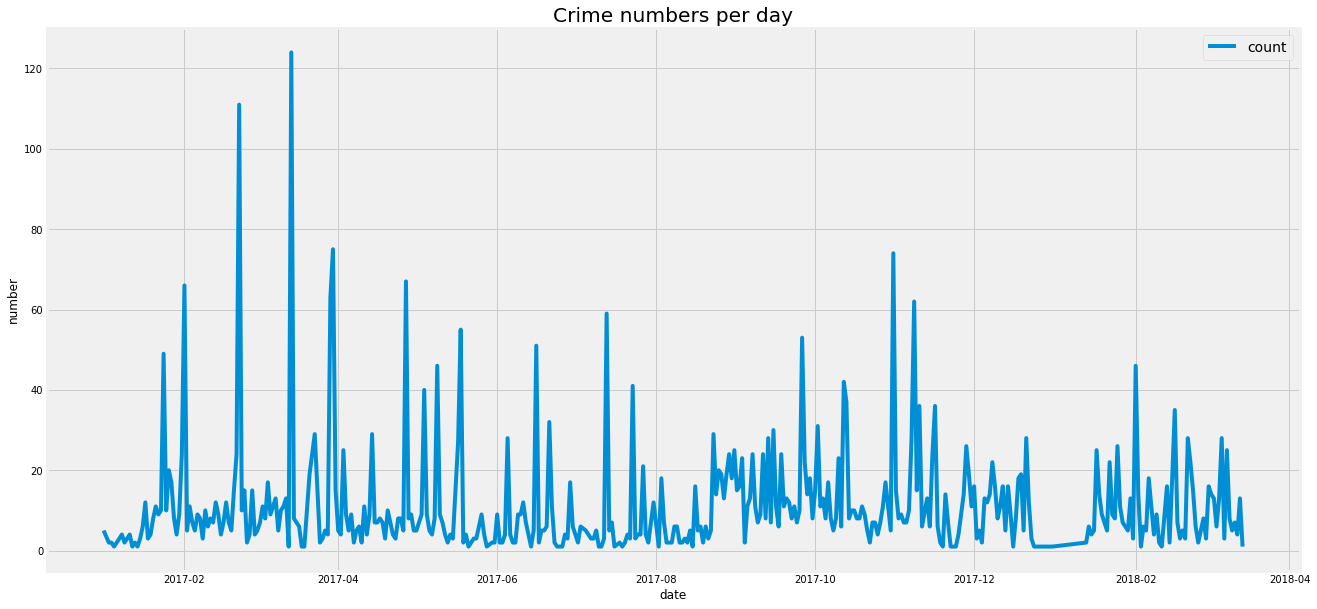

In [128]:
plt.figure(figsize=(20,10))
plt.plot(new_ts['date'],new_ts['count'])
plt.style.use('fivethirtyeight')
plt.title("Crime numbers per day")
plt.xlabel("date")
# plt.xticks(x,[i for i in data.index])
plt.ylabel("number")
# plt.plot_date(x_date,data['close'],'-',label="y")
# plt.plot_date(x_date,data['high'],'-',color='r',label="x")
plt.legend()
plt.grid(True)

In [154]:
hour_series = pd.DataFrame(time_crime['Hour'].value_counts().reset_index())
hour_series.columns = ['hour', 'count']
hour_series

,hour,count
0,0,557
1,23,500
2,1,372
3,22,358
4,2,270
5,21,258
6,18,206
7,20,194
8,12,187
9,17,175


In [155]:
hour_series["hour"] = hour_series["hour"].astype(int)
hour_series["count"] = hour_series["count"].apply(lambda x: x/439200*100)
new_hs = hour_series.sort_values(by = ['hour'])
new_hs

,hour,count
0,0,0.126821
2,1,0.084699
4,2,0.061475
14,3,0.021630
20,4,0.015938
23,5,0.007058
21,6,0.010018
22,7,0.007514
17,8,0.020264
18,9,0.017077


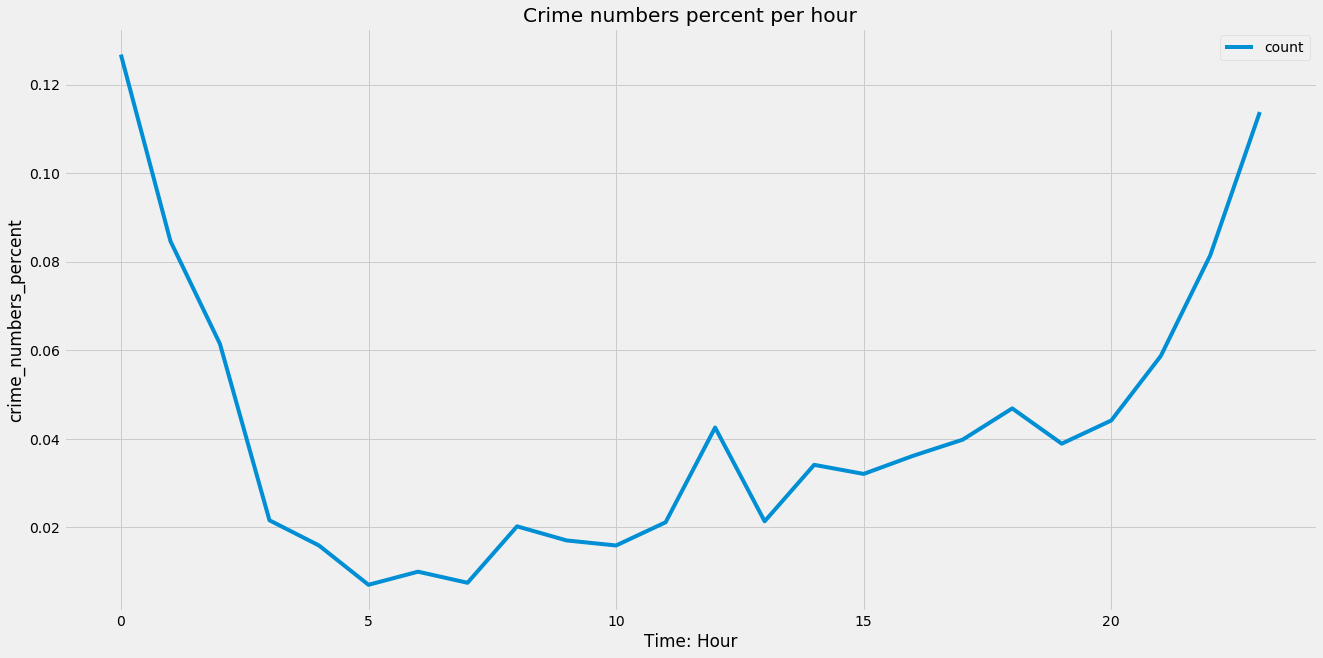

In [160]:
plt.figure(figsize=(20,10))
plt.plot(new_hs['hour'],new_hs['count'])
plt.style.use('fivethirtyeight')
plt.title("Crime numbers percent per hour")
plt.xlabel("Time: Hour")
plt.ylabel("crime_numbers_percent")
plt.legend()
plt.grid(True)